In [1]:
import re # re module provide sregular expression matching opereations similar to perl
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
# np supports arrays and matrices, along with mathematical functions for scientific computing
import numpy as np
np.set_printoptions(threshold=np.inf) # print full NumPy array, no ellipsis

In [2]:
def get_requirements():

    print("Developer Anthony Threlfall")

    print("Data Analysis 2")
    print("\nProgram Requirements:\n"
    + "1. Run demo.py.\n"
    + "2. If errors, more than likely missing installations.\n"
    + "3. Test Python Package Installer: pip freeze.\n"
    + "4. Research how to install any missing packages:\n"
    + "5. Create at least three functions that are called by the program:\n"
    + "\ta. main(): calls at least two other functions.\n"
    + "\tb. get_requirements(): displays the program requirements.\n"
    + "\tc. data_analysis_2(): displays results as per demo.py.\n"
    + "6. Display graph as per instructions w/in demo.py.")

In [3]:
def data_analysis_2():
    # Read CSV (coma-separeted values) file into DataFrame

    url = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Stat2Data/Titanic.csv"
    df = pd.read_csv(url)

    print("***DataFrame composed of three components: index, columns, and data. Data also known as values. ***")

    index = df.index
    columns = df.columns
    values = df.values

    print("\n1. Print indexes:")
    print(index)

    print("\n2. Print columns:")
    print(columns)

    # Same as above
    print("\n3. Print columns (another way):")
    print(df.columns[:]) # using slicing notation

    print("\n4. Print (all) values, in array format")
    print(values)

    print("\n5. ***Print component data types: ***")
    print("\na) index type:")
    print(type(index))
    # pandas.coreindexes.range.RangeIndex

    print("\nb) columns type:")
    print(type(values))
    # pandas.core.indexes.base.Index

    print("\nc) values type:")
    print(type(values))
    # numpy.ndarray

    print("\n6. Print summary of DataFrame (similar to 'describe tablename;' in MySQL):")
    print(df.info())

    print("\n7. First five lines (all columns):")
    print(df.head())

    # Note: 'Unnamed: 0' appears to be used just to number rows
    df = df.drop('Unnamed: 0', 1) # drop column 'Unnamed: 0'
    print("\n8. Print summary of DataFrame (after dropping column 'Unnamed: 0'):")
    print(df.info())

    print("\n9. First five lines (after dropping column 'Unnamed: 0'):")
    print(df.head())

    # Precise data selection (data slicing):
    # 1) DataFrame.loc gets rows (or columns) with particular labels (names) from index
    # 2) DataFrame.iloc (stands for integer location) gets rows (or columns) at particular positions in index (i.e., only takes integers)

    print("\n***Precise data selection (data slicing): ***")
    print("\n10. Using iloc, return first 3 rows:")
    print(df.iloc[:3])
    # print(df.iloc[0:3:1]) # equivalent to above slicing notation = start:stop:step

    print("\n11. Using iloc, return last 3 rows (start on index 1310 to end):")
    print(df.iloc[1310:])

    # select rows and columns simultaneously
    # separate row and column with comma
    # example: df.iloc[row_index, column_index]

    print("\n12. Select rows 1, 3, and 5: and columns 2, 4, and 6 (includes index column):")
    a = df.iloc[[0, 2, 4], [1, 3, 5]]
    print(a)

    print("\n13. Select all rows; and columns 2, 4, and 6 (includes index column):")
    a = df.iloc[:,[1, 3, 5]]
    print(a)

    print("\n14. Select rows 1, 3, and 5; and all columns (includes index column):")
    a = df.iloc[[0, 2, 4],:]
    print(a)
    # same as above
    # a = df.iloc[[0, 2, ]] # note: leaving out colon selects all columns as well
    # print(a)

    print("\n15. Select all rows, and all columns (includies index column). Note: only first and last 30 records displayed:")
    a = df.iloc[:, :]
    print(a)

    print("\n16. Select all rows, and all columns, starting at column 2 (inludes index column). Note: only first and last 30 records display:")
    a = df.iloc[:, 1:]
    print(a)

    print("\n17. Select row 1, and column1, (includes index column):")
    # Note: .iloc does *not* contain last index value -- here, should have included 1!
    a = df.iloc[0:1, 0:1]
    print(a)

    print("\n18. Select rows 3-5, and columns 3-5, (includes index column):")
    # note: .iloc does *not* contain last index value--here, should have included 5!
    a = df.iloc[2:5, 2:5]
    print(a)

    print("\n19. ***Convert pandas DataFrame df to NumPy ndarray, use values command: ***")
    # Select all rows, and all columns, starting at column2:
    b = df.iloc[:,1:].values # ndarray = N-dimensional array (rows and columns)

    print("\n20. Print data frame type:")
    print(type(df))

    print("\n21. Print a type:")
    print(type(a))

    print("\n22. Print b type:")
    print(type(b))

    print("\n23. Print number of dimensions and items in array (rows, columns). Remember: starting at column 2:")
    print(b.shape)

    print("\n24. Print type of items in array. Remember: ndarray is an array of arrays. Each record/item is an array.")
    print(b.dtype)

    print("\n25. Printing a:")
    print(a)

    print("\n26. Length a:")
    print(len(a))

    print("\n27. Printing b:")
    print(b)

    print("\n28. Length b:")
    print(len(b))

    # Print element of ndarray b in *second* row, *third* column
    print("\n29. Print element of (NumPy array) ndarray b in * second* row, *third* column:")
    print(b[1, 2])

    print("\n30. Print all records for NumPy array column 2:")
    print(b[:, 1])

    print("\n31. Get passenger names:")
    names = df["Name"]
    print(names)

    print("\n32. Find all passengers with name 'Allison' (using regular expressions):")
    # Note 'r' obviates the need for an escape sequence
    for name in names:
        print(re.search(r'(Allison)',name))

    # will automatically return options to their default values
    # with pd.option..context('display.max_rows',None):
    # print(df) # print entire dataframe

    print("\n***33. Statistical Analysis (DataFrame notation): **")
    # difference between np.mean and np.average: average takes optional weight parameter.If not supplied they are equivalent.
    print("\na) Print mean age:")
    avg = df["Age"].mean() # second column
    print(avg)

    print("\nb) Print mean age, rounded to two decimal places:")
    avg = round(df["Age"].mean(), 2) # will *not* display last 0
    print(avg)

    print("\nc) Print mean of every column in DataFrame (may not be suitable with certain columns):")
    avg_all = df.mean(axis=0) # mean every column
    #avg_all = df.mean(axis=1) # mean every row
    print(avg_all)

    print("\nd) Print summary statistics (DataFrame notation):")
    # returns three quartiles, mean, count, min/max values, and standard deviation
    describe = df["Age"].describe() # second column
    # describe = df["Age"].describe(percentiles=[.10, .20, .50, .80]) # choose different percentiles
    print(describe)

    print("\ne) Print minimum age (DataFrame notation):")
    # can also do functions separately
    min = df["Age"].min() # second column
    print(min)

    print("\nf) Print maximum age (DataFrame notation):")
    max = df["Age"].max()  # second column
    print(max)

    print("\ng) Print median age (DataFrame notation):")
    median = df["Age"].median()   # second column
    print(median)

    print("\nh) Print mode age (DataFrame notation):")
    mode = df["Age"].mode() #second column
    print(mode)

    print("\ni) Print number of values (DataFrame notation):")
    count = df["Age"].count()   # second column
    print(count)

    print("\n**Graph: Display ages of the first 20 passengers (use code from previous assignment): ***")

    # Research what these styles do!
    # style.use('fivethirtyeight')
    # compare with...
    style.use('ggplot')
    df = df.head(20)

    # Why is the graph line split
    # because some age values use "nan" -- can't graph "nan"!

    df['Age'].plot()
    plt.legend()
    plt.show()

Developer Anthony Threlfall
Data Analysis 2

Program Requirements:
1. Run demo.py.
2. If errors, more than likely missing installations.
3. Test Python Package Installer: pip freeze.
4. Research how to install any missing packages:
5. Create at least three functions that are called by the program:
	a. main(): calls at least two other functions.
	b. get_requirements(): displays the program requirements.
	c. data_analysis_2(): displays results as per demo.py.
6. Display graph as per instructions w/in demo.py.
***DataFrame composed of three components: index, columns, and data. Data also known as values. ***

1. Print indexes:
RangeIndex(start=0, stop=1313, step=1)

2. Print columns:
Index(['Unnamed: 0', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

3. Print columns (another way):
Index(['Unnamed: 0', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

4. Print (all) values, in array format
[[1 'Allen, Miss Elisabeth Walton' '1st' 29.0 'fema

30.397989417989415

b) Print mean age, rounded to two decimal places:
30.4

c) Print mean of every column in DataFrame (may not be suitable with certain columns):
Age         30.397989
Survived     0.342727
SexCode      0.351866
dtype: float64

d) Print summary statistics (DataFrame notation):
count    756.000000
mean      30.397989
std       14.259049
min        0.170000
25%       21.000000
50%       28.000000
75%       39.000000
max       71.000000
Name: Age, dtype: float64

e) Print minimum age (DataFrame notation):
0.17

f) Print maximum age (DataFrame notation):
71.0

g) Print median age (DataFrame notation):
28.0

h) Print mode age (DataFrame notation):
0    22.0
dtype: float64

i) Print number of values (DataFrame notation):
756

**Graph: Display ages of the first 20 passengers (use code from previous assignment): ***


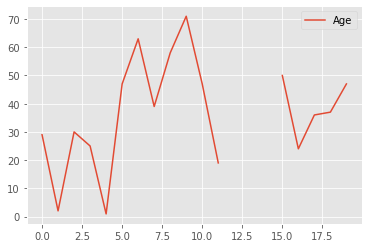

In [4]:
import functions as f

def main():
    f.get_requirements()
    f.data_analysis_2()

if __name__ == "__main__":
    main()